# Exploratory Data Analysis (EDA) For An E-Commerce Data

In [1]:
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Load Dataset

In [2]:
# Specify the column(s) to be parsed as dates
parse_dates = ['InvoiceDate']

# Specify the column(s) and their desired data types
dtype_dict = {
    'CustomerID': str
}

# Path to the dataset
dataset1_path = "dataset1-online-retail.csv"

# Read the CSV file, parsing the specified columns as datetime and setting data types for others
dataset1 = pd.read_csv(dataset1_path, encoding='unicode_escape', parse_dates=parse_dates, dtype=dtype_dict)

# print shape of the data
print(f"dataset1 shape: {dataset1.shape}")

# Display the first few rows of the dataset
dataset1.head()

dataset1 shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


### Explanation
- In this code:
  - The `parse_dates` parameter is used to parse the `InvoiceDate` column as a `datetime`.
  - The `dtype` parameter is used to specify that the `CustomerID` column should be treated as a `string`.

## Step 2: Rename Variables

In [12]:
# Define the dictionary for renaming columns
new_names = {
    'InvoiceDate': 'InvoiceDateTime',
}
def rename_columns(df, new_names):
    # Rename the columns based on the new_names dictionary
    dataset1_renamed = df.rename(columns=new_names)
    
    return dataset1_renamed
dataset1_renamed = rename_columns(dataset1, new_names)
dataset1_renamed.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [13]:
dataset1_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        541909 non-null  object        
 1   StockCode        541909 non-null  object        
 2   Description      540455 non-null  object        
 3   Quantity         541909 non-null  int64         
 4   InvoiceDateTime  541909 non-null  datetime64[ns]
 5   UnitPrice        541909 non-null  float64       
 6   CustomerID       406829 non-null  object        
 7   Country          541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


## Step 2: Check For `null` Values

In [14]:
def check_null_values(df):
    """
    Function to check for null values in each column of the DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame to check for null values.
    
    Returns:
    None
    """
    null_counts = df.isnull().sum()
    total_rows = len(df) 
    null_percentage = (null_counts / total_rows) * 100

    null_df = pd.DataFrame({
        'Feature': null_counts.index,
        'Count of Null Values': null_counts.values,
        'Percentage of Null Values': null_percentage.values
    })
    # print shape of the data
    print(f"dataset1 shape: {df.shape}")
    return null_df

# Check for null values in the DataFrame and get the result as a DataFrame
null_values_df = check_null_values(dataset1_renamed)

# Display the resulting DataFrame
null_values_df

dataset1 shape: (541909, 8)


,Feature,Count of Null Values,Percentage of Null Values
0,InvoiceNo,0,0.000000
1,StockCode,0,0.000000
2,Description,1454,0.268311
3,Quantity,0,0.000000
4,InvoiceDateTime,0,0.000000
5,UnitPrice,0,0.000000
6,CustomerID,135080,24.926694
7,Country,0,0.000000


### Explanation
- In this code:
    - `check_null_values` function: The function calculates the number of null values and their percentage for each column.
    -  A new DataFrame `null_df` is created with columns for feature names, count of null values, and percentage of null values.
    -   The function returns the `null_df` DataFrame containing the desired information.

## Step 3: Handle `null` Values

In [15]:
def remove_null_rows(df, columns_to_check):
    """
    Function to remove rows with null values in specified columns.

    Parameters:
    df (pandas.DataFrame): The DataFrame to clean.
    columns_to_check (list): List of columns to check for null values.

    Returns:
    pandas.DataFrame: A DataFrame with rows containing null values in the specified columns removed.
    """
    # Print the original DataFrame shape
    print(f"Original DataFrame shape: {df.shape}")

    cleaned_df = df.dropna(subset=columns_to_check)

    # Print the cleaned DataFrame shape
    print(f"Cleaned DataFrame shape: {cleaned_df.shape}")
    return cleaned_df

# Specify the columns to check for null values (adjust as needed)
columns_to_check = ['CustomerID', 'Description']

# Remove rows with null values in the specified columns and save the result in a new DataFrame
dataset1_without_nulls = remove_null_rows(dataset1_renamed, columns_to_check)

# Display the resulting DataFrame
dataset1_without_nulls.head()

Original DataFrame shape: (541909, 8)
Cleaned DataFrame shape: (406829, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## Step 3: Data Filtering

In [6]:
def display_negative_values(df, columns_to_check):
    """
    Function to display rows with negative values in specified columns.

    Parameters:
    df (pandas.DataFrame): The DataFrame to check.
    columns_to_check (list): List of columns to check for negative values.

    Returns:
    pandas.DataFrame: A DataFrame with rows containing negative values in the specified columns.
    """
    # Identify rows with negative values in the specified columns
    negative_values_df = df[df[columns_to_check].lt(0).any(axis=1)]

    # Print the number of rows with negative values
    print(f"Rows with negative values in specified columns: {negative_values_df.shape[0]}")

    # Display the rows with negative values
    #print(negative_values_df)

    #return negative_values_df

# Specify the columns to check for negative values
columns_to_check_negative = ['Quantity', 'UnitPrice']

# Display rows with negative values in the specified columns
display_negative_values(dataset1_without_nulls, columns_to_check_negative)


Rows with negative values in specified columns: 8905


In [16]:
def remove_negative_values(df, columns_to_check):
    """
    Function to remove rows with negative values in specified columns.

    Parameters:
    df (pandas.DataFrame): The DataFrame to clean.
    columns_to_check (list): List of columns to check for negative values.

    Returns:
    pandas.DataFrame: A DataFrame with rows containing negative values in the specified columns removed.
    """
    # Print the original DataFrame shape
    print(f"Original DataFrame shape: {df.shape}")

    # Drop rows with negative values in the specified columns
    cleaned_df = df[(df[columns_to_check] >= 0).all(axis=1)]

    # Print the cleaned DataFrame shape
    print(f"Cleaned DataFrame shape: {cleaned_df.shape}")

    return cleaned_df

# Specify the columns to check for negative values
columns_to_check_negative = ['Quantity', 'UnitPrice']

# If needed, remove rows with negative values and save the result in a new DataFrame
filtered_dataset1 = remove_negative_values(dataset1_without_nulls, columns_to_check_negative)

# Display the resulting DataFrame
filtered_dataset1.head()

Original DataFrame shape: (406829, 8)
Cleaned DataFrame shape: (397924, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


### Explanation
- `display_negative_values` function:
  - Identifies and displays rows with negative values in the specified columns.
  - Prints the number of such rows and shows the rows themselves.
- `remove_negative_values` function: Removes rows with negative values in specified columns.

## Step 4: Feature Engineering
* From our data preview, we can generate the following fields:
    - `TotalAmount` = `Quantity` x `UnitPrice`
    - `Date` - extracted from the `InvoiceDate` fields
    - `DayOfWeek` from the `Date` 

In [24]:
def feature_engineering(df):
    """
    Function to perform feature engineering on the DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame to process.
    
    Returns:
    pandas.DataFrame: The DataFrame with additional features.
    """
    df = df.copy()  # Make a copy of the DataFrame to avoid SettingWithCopyWarning
    
    # Extract the date from InvoiceDate
    df['InvoiceDate'] = df['InvoiceDateTime'].dt.date
    
    # Calculate InvoiceAmount as the product of UnitPrice and Quantity
    df['InvoiceAmount'] = df['UnitPrice'] * df['Quantity']

    # Extract the day of the week from Date
    df['InvoiceDayOfWeek'] = df['InvoiceDate'].apply(lambda x: x.strftime('%A'))

    # Create MonthYear column
    df['InvoiceYearMonth'] = df['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m-01'))
    df['InvoiceYearMonth'] = pd.to_datetime(df['InvoiceYearMonth'])
    
    return df

# Perform feature engineering on the cleaned DataFrame
enhanced_dataset = feature_engineering(filtered_dataset1)

# save the result
enhanced_dataset.to_csv("dataset1-online-retail-enhanced.csv", index=False)

# Display the resulting DataFrame with new features
enhanced_dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate,InvoiceAmount,InvoiceDayOfWeek,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,15.30,Wednesday,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,20.34,Wednesday,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,22.00,Wednesday,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,20.34,Wednesday,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,20.34,Wednesday,2010-12-01


### Explanations
- Use `.copy()` to create a copy of the DataFrame where modifications are done. This avoids `SettingWithCopyWarning` by ensuring that operations are performed on a new DataFrame rather than a view of the original one.
- Uses `df['InvoiceDate'].dt.date` to create a `Date` column from the `InvoiceDate` datetime column.
-  Multiplies `UnitPrice` by `Quantity` to create the `InvoiceAmount` column.
-  Use `apply(lambda x: x.strftime('%A'))` on the Date column to convert the date into the full weekday name (e.g., "Monday", "Tuesday").
-  Add `MonthYear` column by formatting the `Date` column to `'%Y-%m'`, which represents the year and month.

## Step 5: Descriptive Statistics

In [18]:
# descriptive statistics function
def descriptive_statistic(df):
    # Specifying datetime_is_numeric=True adopts the future behavior of Treating datetime data as categorical rather than numeric
    descriptive_statistic_df = df.describe(include='all')
    return descriptive_statistic_df
 

descriptive_statistic(enhanced_dataset)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate,InvoiceAmount,InvoiceDayOfWeek,InvoiceYearMonth
count,397924,397924,397924,397924.000000,397924,397924.000000,397924,397924,397924,397924.000000,397924,397924
unique,18536,3665,3877,NaN,NaN,NaN,4339,37,305,NaN,6,13
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,17841,United Kingdom,2011-11-06,NaN,Thursday,2011-11
freq,542,2035,2028,NaN,NaN,NaN,7847,354345,3423,NaN,80052,64545
mean,NaN,NaN,NaN,13.021823,2011-07-10 23:43:36.912475648,3.116174,NaN,NaN,NaN,22.394749,NaN,NaN
min,NaN,NaN,NaN,1.000000,2010-12-01 08:26:00,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,2.000000,2011-04-07 11:12:00,1.250000,NaN,NaN,NaN,4.680000,NaN,NaN
50%,NaN,NaN,NaN,6.000000,2011-07-31 14:39:00,1.950000,NaN,NaN,NaN,11.800000,NaN,NaN
75%,NaN,NaN,NaN,12.000000,2011-10-20 14:33:00,3.750000,NaN,NaN,NaN,19.800000,NaN,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,8142.750000,NaN,NaN,NaN,168469.600000,NaN,NaN


### Step 5.1: Summary Statistics By Country

In [19]:
def summary_statistics_by_country(df):
    """
    Function to generate summary statistics by country from the DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame with the feature-engineered data.
    
    Returns:
    pandas.DataFrame: DataFrame with summary statistics by country.
    """
    # Group by country and calculate required statistics
    summary = df.groupby('Country').agg(
        NumberOfMonthts=('InvoiceYearMonth', 'nunique'),
        NumberOfInvoices=('InvoiceNo', 'nunique'),
        NumberOfCustomers=('CustomerID', 'nunique'),
        TotalInvoiceAmount=('InvoiceAmount', 'sum'),
        UniqueDatesCount=('InvoiceDate', 'nunique'),
        UniqueProducts=('Description', 'nunique')
    ).reset_index()

    # Rename columns for better readability
    summary.columns = [
        'Country',
        'Number of Invoice Months',
        'Number of Invoices',
        'Number of Customers',
        'Total Invoice Amount',
        'Unique Invoice Dates Count',
        'Unique Products'
    ]
    # Calculate Average Invoice Amount
    summary['AverageInvoiceAmount'] = summary['Total Invoice Amount'] / summary['Number of Invoices']

     # Round the values to whole numbers
    summary = summary.round({
        'Number of Invoices': 0,
        'Number of Customers': 0,
        'Total Invoice Amount': 0,
        'Unique Invoice Dates Count': 0,
        'AverageInvoiceAmount': 0
    })

    # Sort by Number of Invoices in descending order
    summary_sorted = summary.sort_values(by='Number of Invoices', ascending=False)

    return summary_sorted

# Perform summary statistics on the enhanced dataset
country_summary = summary_statistics_by_country(enhanced_dataset)

# Display the summary statistics
country_summary

,Country,Number of Invoice Months,Number of Invoices,Number of Customers,Total Invoice Amount,Unique Invoice Dates Count,Unique Products,AverageInvoiceAmount
35,United Kingdom,13,16649,3921,7308392.0,305,3844,439.0
14,Germany,13,457,94,228867.0,201,1697,501.0
13,France,13,389,87,209024.0,205,1544,537.0
10,EIRE,13,260,3,265546.0,154,1988,1021.0
3,Belgium,13,98,25,41196.0,83,784,420.0
23,Netherlands,13,95,9,285446.0,63,803,3005.0
30,Spain,13,90,30,61577.0,76,1105,684.0
0,Australia,12,57,9,138521.0,44,608,2430.0
26,Portugal,13,57,19,33440.0,47,694,587.0
32,Switzerland,12,51,21,56444.0,47,954,1107.0


### Explanations
- The `groupby('Country')` method groups the data by the `Country` field.
- The `agg()` function calculates:
  - `NumberOfInvoices`: Number of unique invoices.
  - `NumberOfCustomers`: Number of unique customers.
  - `TotalInvoiceAmount`: Sum of all invoice amounts.
  - `UniqueDatesCount`: Number of unique dates invoices were created.

## Step 6: Data Visualizations

### Step 6.1: Summary By Country

### Step 6.2: Summary By Day Of Week
1. Count of Unique Invoices by Day of the Week
2. Average InvoiceAmount by Day of the Week
3. Count of CustomerID by Day of the Week

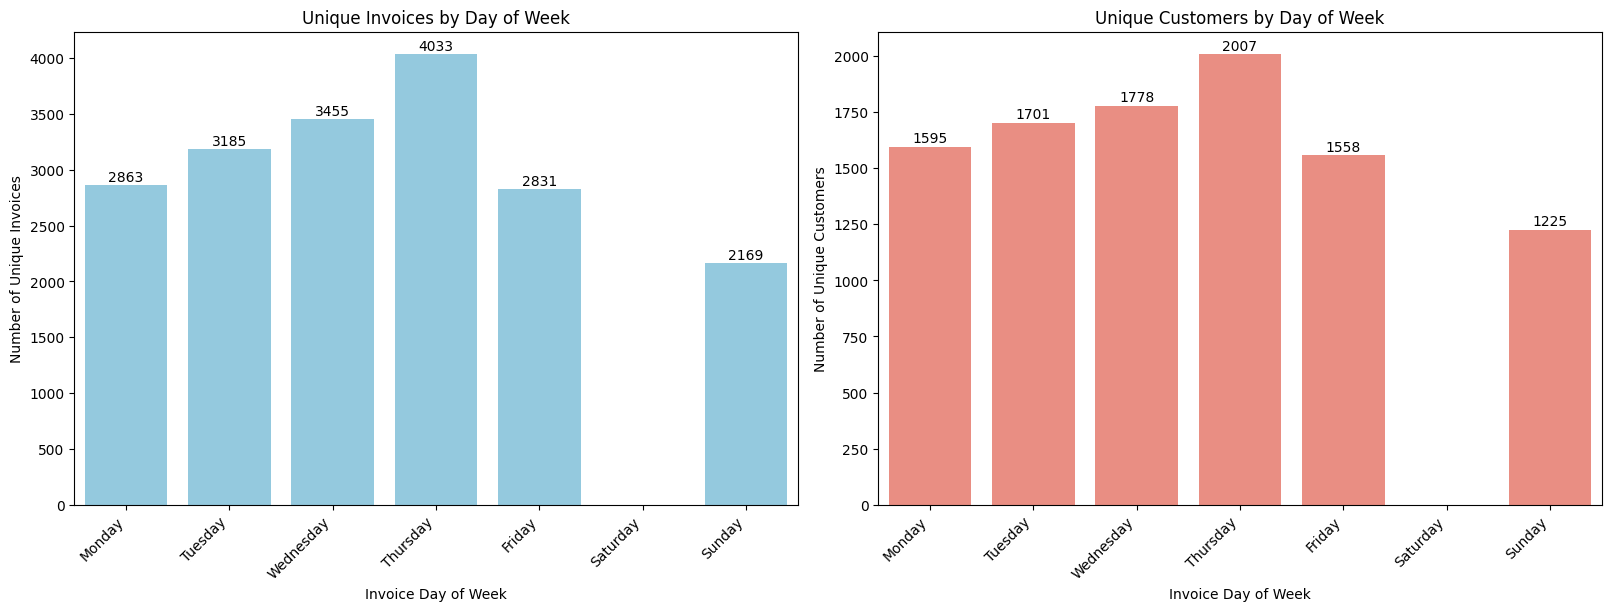

In [20]:
def visualize_data_in_subplots(df):
    """
    Function to create a 2x2 grid of subplots to visualize various metrics by DayOfWeek.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame with the feature-engineered data.
    
    Returns:
    None
    """
    # Group data and calculate metrics
    unique_invoices_by_day = df.groupby('InvoiceDayOfWeek')['InvoiceNo'].nunique().reset_index()
    unique_invoices_by_day.columns = ['InvoiceDayOfWeek', 'UniqueInvoiceCount']

    customer_count_by_day = df.groupby('InvoiceDayOfWeek')['CustomerID'].nunique().reset_index()
    customer_count_by_day.columns = ['InvoiceDayOfWeek', 'UniqueCustomerCount']

    # Sort by DayOfWeek to ensure consistent order
    days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    unique_invoices_by_day['InvoiceDayOfWeek'] = pd.Categorical(unique_invoices_by_day['InvoiceDayOfWeek'], categories=days_of_week_order, ordered=True)
    customer_count_by_day['InvoiceDayOfWeek'] = pd.Categorical(customer_count_by_day['InvoiceDayOfWeek'], categories=days_of_week_order, ordered=True)

    unique_invoices_by_day = unique_invoices_by_day.sort_values('InvoiceDayOfWeek')
    customer_count_by_day = customer_count_by_day.sort_values('InvoiceDayOfWeek')

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

     # Plot Unique Invoices by Day of Week
    sns.barplot(x='InvoiceDayOfWeek', y='UniqueInvoiceCount', data=unique_invoices_by_day, color='skyblue', ax=axes[0])
    axes[0].set_title('Unique Invoices by Day of Week')
    axes[0].set_xlabel('Invoice Day of Week')
    axes[0].set_ylabel('Number of Unique Invoices')
    for index, row in unique_invoices_by_day.iterrows():
        axes[0].text(row['InvoiceDayOfWeek'], row['UniqueInvoiceCount'] + 5,  # Adjust vertical offset (+5)
                      int(row['UniqueInvoiceCount']),
                      ha='center', va='bottom')

    # Plot Unique Customer Count by Day of Week
    sns.barplot(x='InvoiceDayOfWeek', y='UniqueCustomerCount', data=customer_count_by_day, color='salmon', ax=axes[1])
    axes[1].set_title('Unique Customers by Day of Week')
    axes[1].set_xlabel('Invoice Day of Week')
    axes[1].set_ylabel('Number of Unique Customers')
    for index, row in customer_count_by_day.iterrows():
        axes[1].text(row['InvoiceDayOfWeek'], row['UniqueCustomerCount'] + 5,  # Adjust vertical offset (+5)
                      int(row['UniqueCustomerCount']),
                      ha='center', va='bottom')

    # Rotate x-axis labels for better readability
    for ax in axes:
        ax.set_xticks(range(len(days_of_week_order)))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    plt.show()

# Perform visualization on the enhanced dataset
visualize_data_in_subplots(enhanced_dataset)

### Step 6.3: Summary By Year-Month

### Monthly Bar Chart Summary

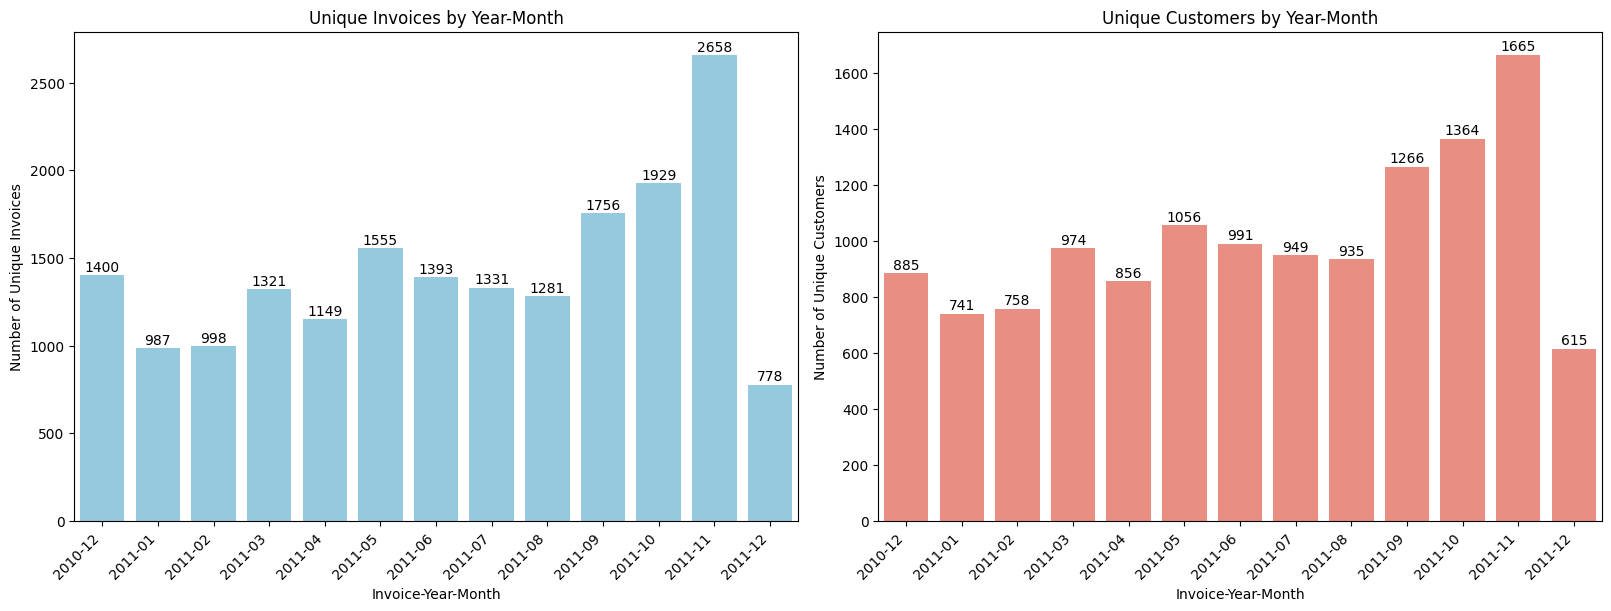

In [21]:
def visualize_data_by_year_month(df):
    """
    Function to create a 2x2 grid of subplots to visualize various metrics by YearMonth.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame with the feature-engineered data.
    
    Returns:
    None
    """
    # Group data and calculate metrics
    unique_invoices_by_month = df.groupby('InvoiceYearMonth')['InvoiceNo'].nunique().reset_index()
    unique_invoices_by_month.columns = ['InvoiceYearMonth', 'UniqueInvoiceCount']

    customer_count_by_month = df.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
    customer_count_by_month.columns = ['InvoiceYearMonth', 'UniqueCustomerCount']

    # Sort by YearMonth to ensure consistent order
    unique_invoices_by_month['InvoiceYearMonth'] = pd.Categorical(unique_invoices_by_month['InvoiceYearMonth'], ordered=True)
    customer_count_by_month['InvoiceYearMonth'] = pd.Categorical(customer_count_by_month['InvoiceYearMonth'], ordered=True)

    unique_invoices_by_month = unique_invoices_by_month.sort_values('InvoiceYearMonth')
    customer_count_by_month = customer_count_by_month.sort_values('InvoiceYearMonth')

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

    # Plot Unique Invoices by YearMonth
    sns.barplot(x='InvoiceYearMonth', y='UniqueInvoiceCount', data=unique_invoices_by_month, color='skyblue', ax=axes[0])
    axes[0].set_title('Unique Invoices by Year-Month')
    axes[0].set_xlabel('Invoice-Year-Month')
    axes[0].set_ylabel('Number of Unique Invoices')
    for index, row in unique_invoices_by_month.iterrows():
        axes[0].text(index, row['UniqueInvoiceCount'] + 5,  # Adjust vertical offset (+5)
                      int(row['UniqueInvoiceCount']),
                      ha='center', va='bottom')

    # Plot Unique Customer Count by YearMonth
    sns.barplot(x='InvoiceYearMonth', y='UniqueCustomerCount', data=customer_count_by_month, color='salmon', ax=axes[1])
    axes[1].set_title('Unique Customers by Year-Month')
    axes[1].set_xlabel('Invoice-Year-Month')
    axes[1].set_ylabel('Number of Unique Customers')
    for index, row in customer_count_by_month.iterrows():
        axes[1].text(index, row['UniqueCustomerCount'] + 5,  # Adjust vertical offset (+5)
                      int(row['UniqueCustomerCount']),
                      ha='center', va='bottom')

    # Rotate x-axis labels for better readability
    for ax in axes:
        ax.set_xticks(range(len(unique_invoices_by_month)))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    plt.show()

# Perform visualization on the enhanced dataset
visualize_data_by_year_month(enhanced_dataset)

### Monthly Line Charts Summary

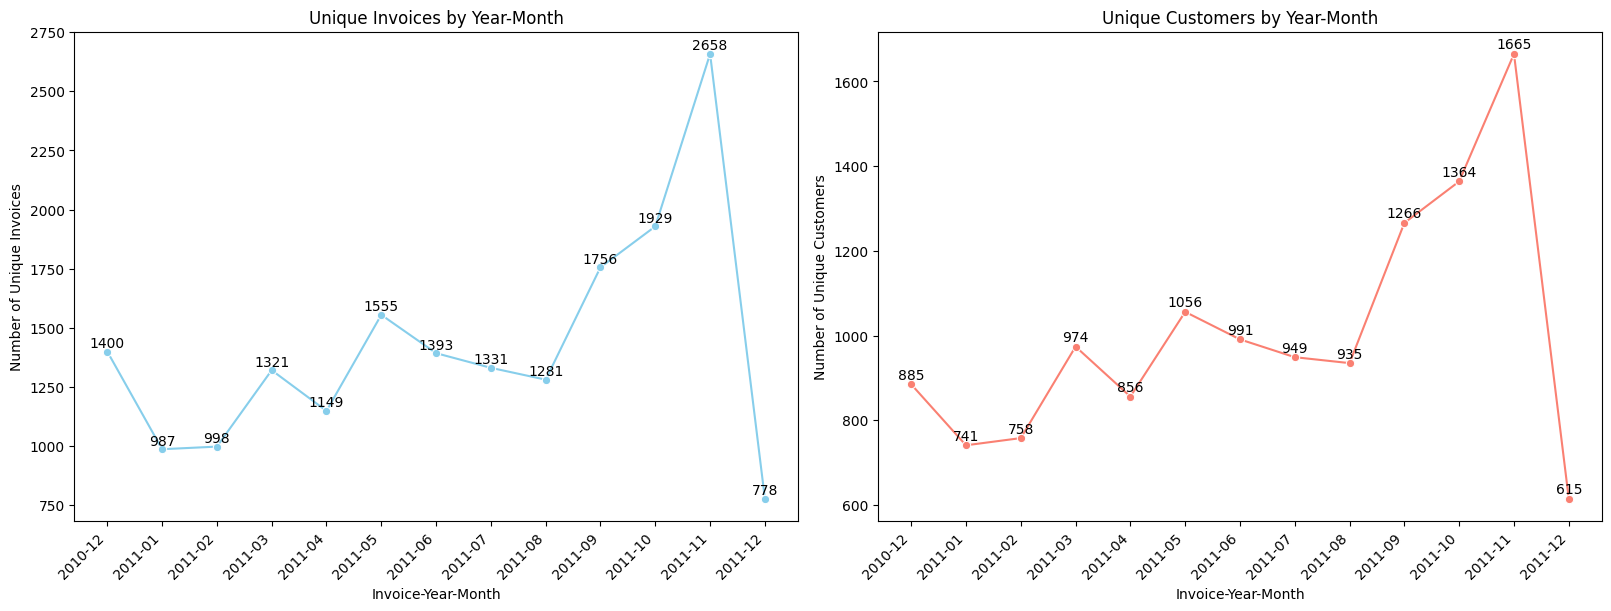

In [23]:
def visualize_data_by_year_month(df):
    """
    Function to create a 2x2 grid of subplots to visualize various metrics by YearMonth.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame with the feature-engineered data.
    
    Returns:
    None
    """
    # Group data and calculate metrics
    unique_invoices_by_month = df.groupby('InvoiceYearMonth')['InvoiceNo'].nunique().reset_index()
    unique_invoices_by_month.columns = ['InvoiceYearMonth', 'UniqueInvoiceCount']

    avg_invoice_amount_by_month = df.groupby('InvoiceYearMonth')['InvoiceAmount'].mean().reset_index()
    avg_invoice_amount_by_month.columns = ['InvoiceYearMonth', 'AvgInvoiceAmount']

    customer_count_by_month = df.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
    customer_count_by_month.columns = ['InvoiceYearMonth', 'UniqueCustomerCount']

    # Sort by YearMonth to ensure consistent order
    unique_invoices_by_month['InvoiceYearMonth'] = pd.Categorical(unique_invoices_by_month['InvoiceYearMonth'], ordered=True)
    avg_invoice_amount_by_month['InvoiceYearMonth'] = pd.Categorical(avg_invoice_amount_by_month['InvoiceYearMonth'], ordered=True)
    customer_count_by_month['InvoiceYearMonth'] = pd.Categorical(customer_count_by_month['InvoiceYearMonth'], ordered=True)

    unique_invoices_by_month = unique_invoices_by_month.sort_values('InvoiceYearMonth')
    customer_count_by_month = customer_count_by_month.sort_values('InvoiceYearMonth')

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

    # Plot Unique Invoices by YearMonth
    sns.lineplot(x='InvoiceYearMonth', y='UniqueInvoiceCount', data=unique_invoices_by_month, marker='o', color='skyblue', ax=axes[0])
    axes[0].set_title('Unique Invoices by Year-Month')
    axes[0].set_xlabel('Invoice-Year-Month')
    axes[0].set_ylabel('Number of Unique Invoices')
    for index, row in unique_invoices_by_month.iterrows():
        axes[0].text(row['InvoiceYearMonth'], row['UniqueInvoiceCount'] + 5,  # Adjust vertical offset (+5)
                      int(row['UniqueInvoiceCount']),
                      ha='center', va='bottom')

    # Plot Unique Customer Count by YearMonth
    sns.lineplot(x='InvoiceYearMonth', y='UniqueCustomerCount', data=customer_count_by_month, marker='o', color='salmon', ax=axes[1])
    axes[1].set_title('Unique Customers by Year-Month')
    axes[1].set_xlabel('Invoice-Year-Month')
    axes[1].set_ylabel('Number of Unique Customers')
    for index, row in customer_count_by_month.iterrows():
        axes[1].text(row['InvoiceYearMonth'], row['UniqueCustomerCount'] + 5,  # Adjust vertical offset (+5)
                      int(row['UniqueCustomerCount']),
                      ha='center', va='bottom')

    # Rotate x-axis labels for better readability
    for ax in axes:
        ax.set_xticks(range(len(unique_invoices_by_month)))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    plt.show()

# Perform visualization on the enhanced dataset
visualize_data_by_year_month(enhanced_dataset)

### Step : Bivariate Analytics
1. Check for correlation between variables